# 抛物线轨迹动画

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import math

Enter the initial velocity (m/s):  100
Enter the angle of projection (degrees):  45


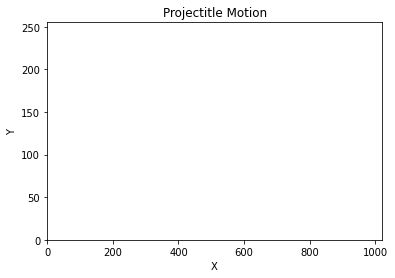

/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py:974: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  'Animation was deleted without rendering anything. This is '


In [2]:
from IPython.display import HTML
plt.rcParams['animation.embed_limit'] = 2**10

g = 9.8

def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start += interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t**2
    circle.center = x, y
    return circle

def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig,
                                   update_position,
                                   fargs=(circle, intervals, u, theta),
                                   frames=len(intervals),
                                   interval=1,
                                   repeat=False)
    
    plt.title('Projectitle Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    # HTML(anim.to_jshtml())  # 产生的文件太大，测试时可以打开

if __name__ == '__main__':
    try:
        u = float(input('Enter the initial velocity (m/s): '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You entered an invalid input')
    else:
        theta = math.radians(theta)
        create_animation(u, theta)